# Prediction of heart disease

## Imports

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from scipy.stats import skew, yeojohnson
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load Dataset

In [3]:
df = pd.read_csv('framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [5]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

## Train - Test Split

In [7]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=12)

train_set.shape, test_set.shape

((3390, 16), (848, 16))

In [9]:
train_set

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,21.51,76.0,215.0,1
4091,1,43,4.0,1,20.0,0.0,0,0,0,198.0,116.0,74.0,23.99,75.0,78.0,0
2046,1,38,2.0,1,7.0,0.0,0,0,0,229.0,116.0,70.0,26.65,77.0,71.0,0
3182,0,53,1.0,0,0.0,0.0,0,1,0,267.0,152.0,89.0,28.49,94.0,103.0,0
328,0,59,1.0,0,0.0,0.0,0,1,0,246.0,189.0,111.0,19.88,90.0,85.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,1,62,1.0,1,30.0,0.0,0,0,0,373.0,138.5,85.0,23.35,80.0,67.0,0
1283,1,56,1.0,1,15.0,0.0,0,0,0,195.0,108.0,70.0,22.92,75.0,117.0,0
3714,1,53,2.0,0,0.0,0.0,0,1,0,198.0,142.5,82.0,23.84,57.0,78.0,1
3325,1,62,1.0,1,5.0,0.0,0,1,0,243.0,157.0,96.0,28.83,75.0,71.0,0


## Missing Values

<Axes: >

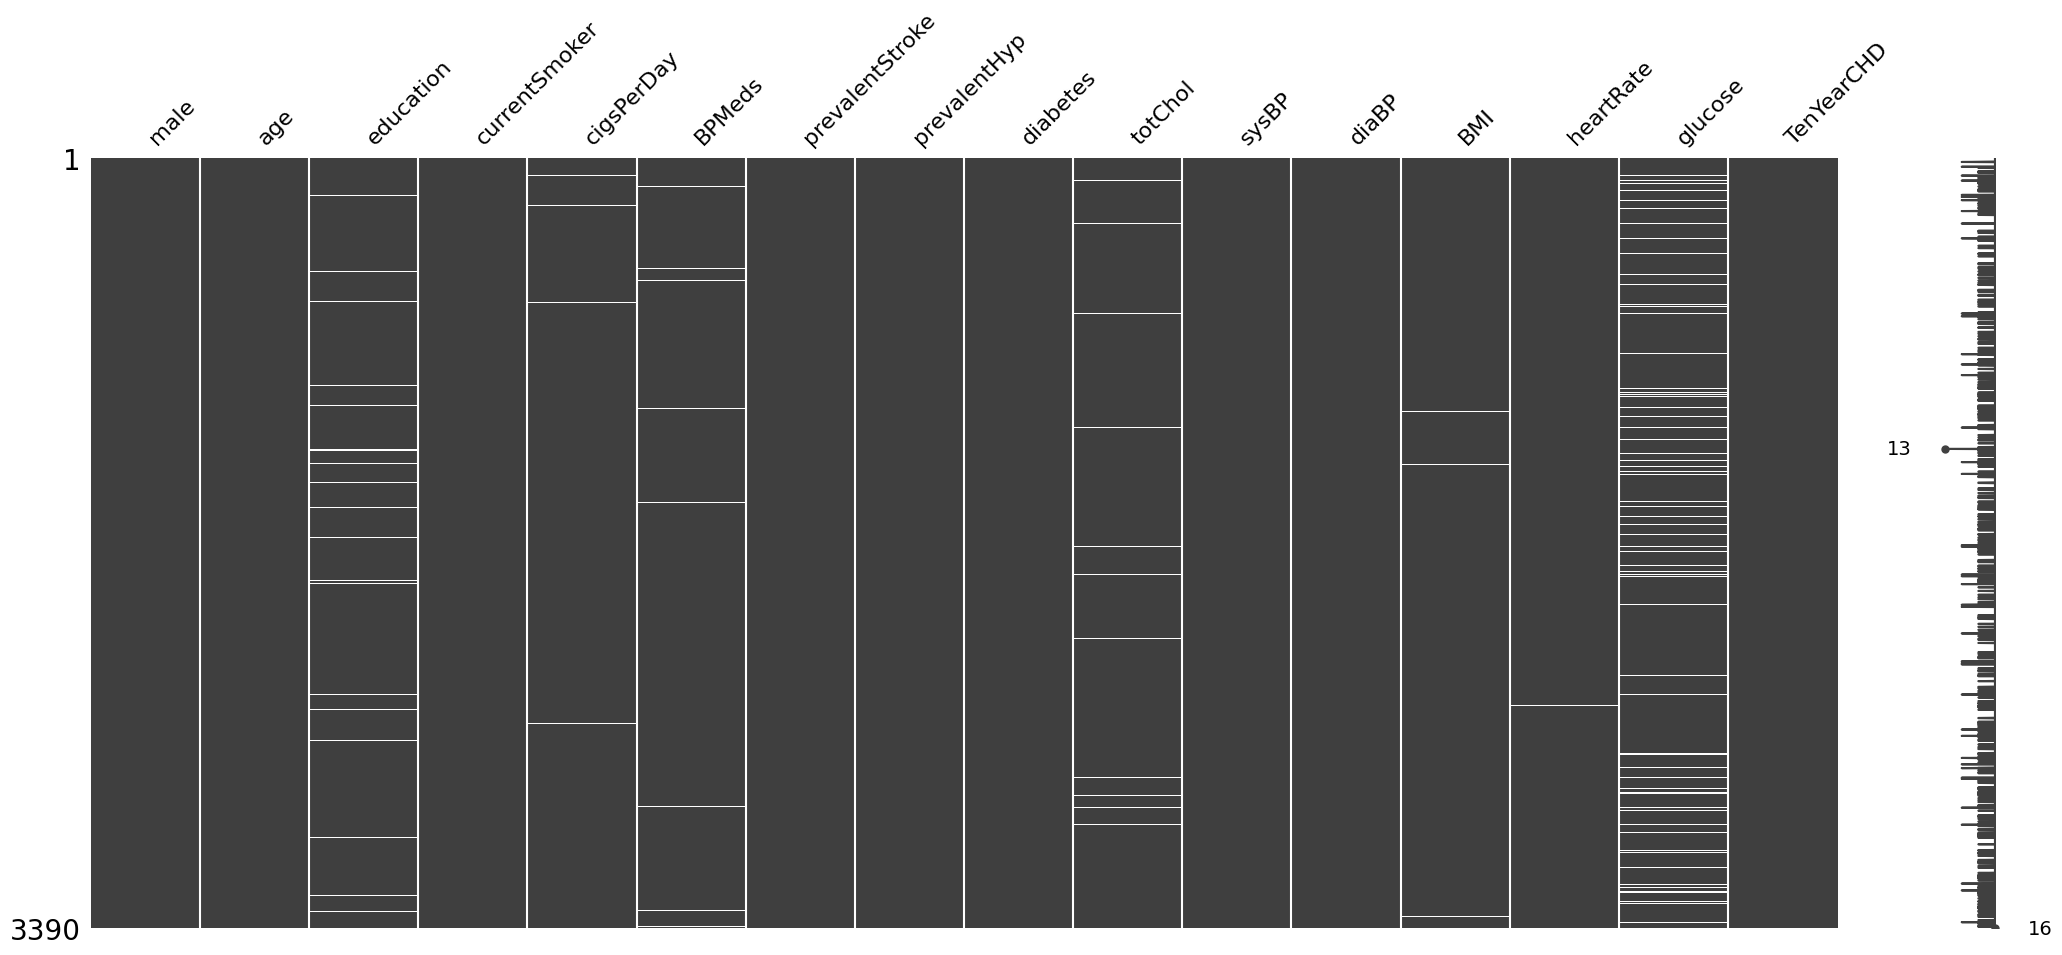

In [10]:
msno.matrix(train_set)

In [12]:
train_set.isna().sum()

male                 0
age                  0
education           88
currentSmoker        0
cigsPerDay          26
BPMeds              43
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 13
heartRate            1
glucose            299
TenYearCHD           0
dtype: int64

### Diagnose missing values

In [27]:
def diagnose_mv(df, mv):
  fig, axes = plt.subplots(15, 2, figsize=(20, 44))
  cols = list(df.columns)
  cols.remove(mv)
  flags = df[mv].isna()

  for i, col in enumerate(cols):
    axes[i, 0].hist(df[col])
    axes[i, 0].set_title(col)
    axes[i, 1].hist(df[col][~flags])
    axes[i, 1].set_title(f'{col} without mv')

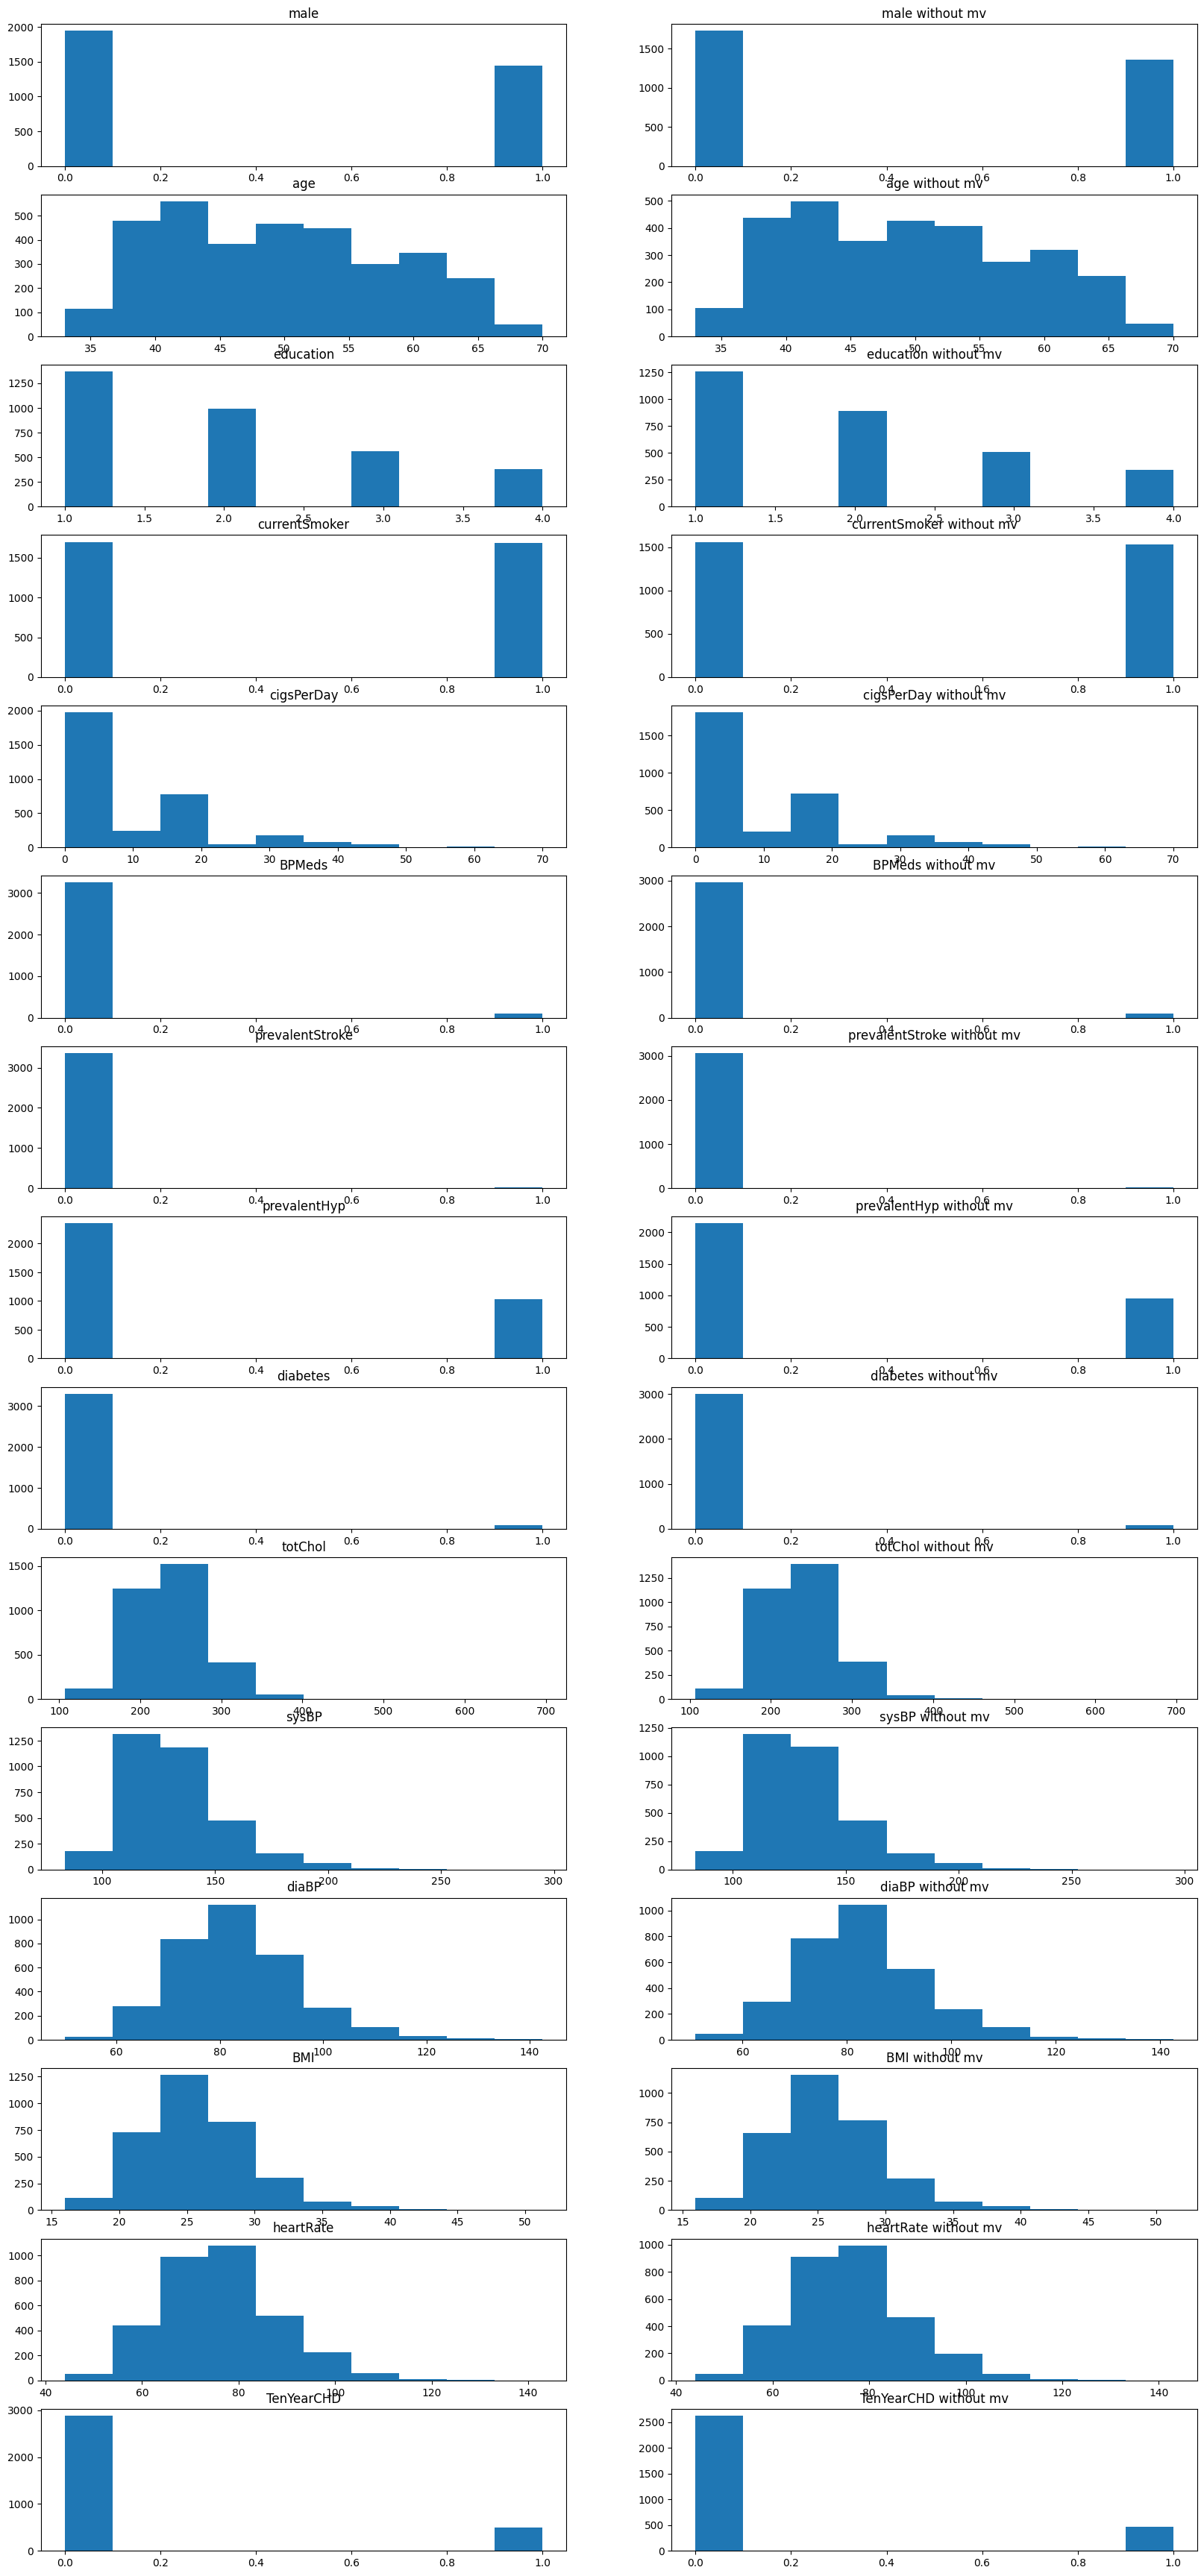

In [29]:
diagnose_mv(train_set, 'glucose')

In [30]:
train_set = train_set.dropna()

In [33]:
train_set.shape

(2926, 16)

## Rename the columns for more codable

In [43]:
train_set.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [47]:
train_set.rename(columns={'currentSmoker': 'current_smoker',
                          'cigsPerDay': 'cigs_per_day',
                          'BPMeds': 'bp_meds',
                          'prevalentStroke': 'prevalent_stroke',
                          'prevalentHyp': 'prevalent_hyp',
                          'totChol': 'tot_chol',
                          'sysBP': 'sys_bp',
                          'diaBP': 'dia_bp',
                          'BMI': 'bmi',
                          'heartRate': 'heart_rate',
                          'TenYearCHD': 'ten_year_chd'}, inplace=True)

<ipython-input-47-d5682c34fe35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.rename(columns={'currentSmoker': 'current_smoker',


## EDA

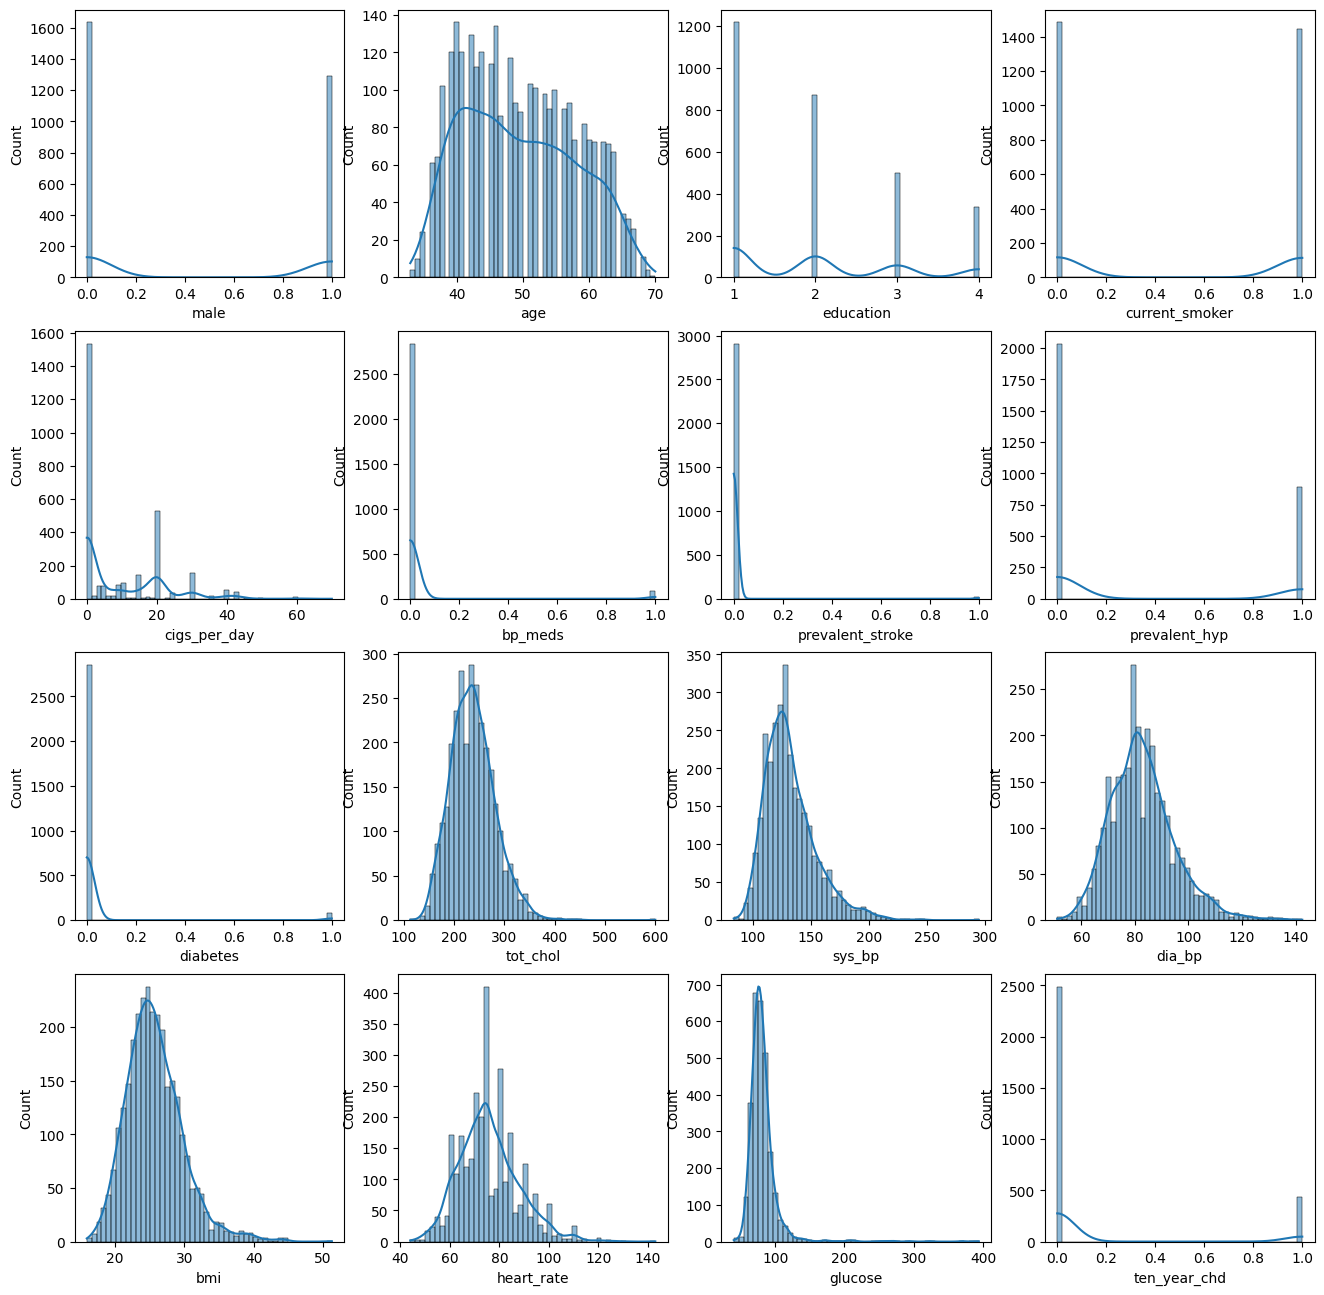

In [48]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes_flat = axes.flatten()

for i, col in enumerate(train_set.columns):
  ax = axes_flat[i]
  sns.histplot(train_set[col], bins=50, kde=True, ax=ax)

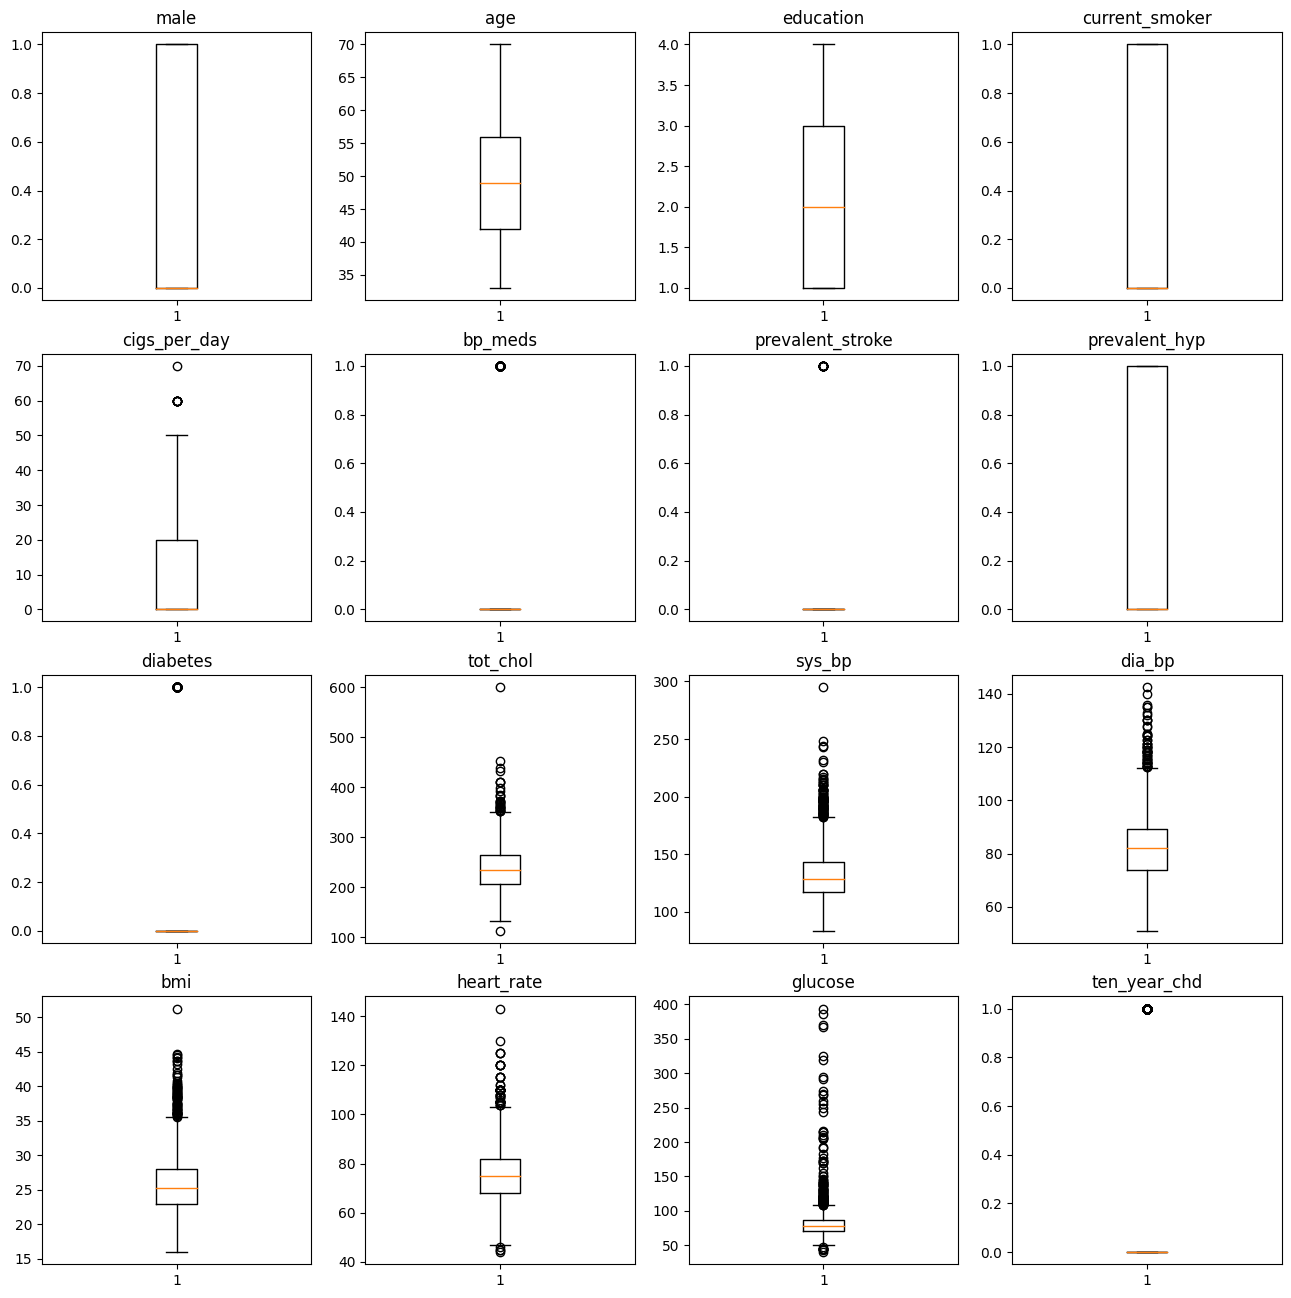

In [49]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes_flat = axes.flatten()

for i, col in enumerate(train_set.columns):
  ax = axes_flat[i]
  ax.boxplot(train_set[col])
  ax.set_title(col)

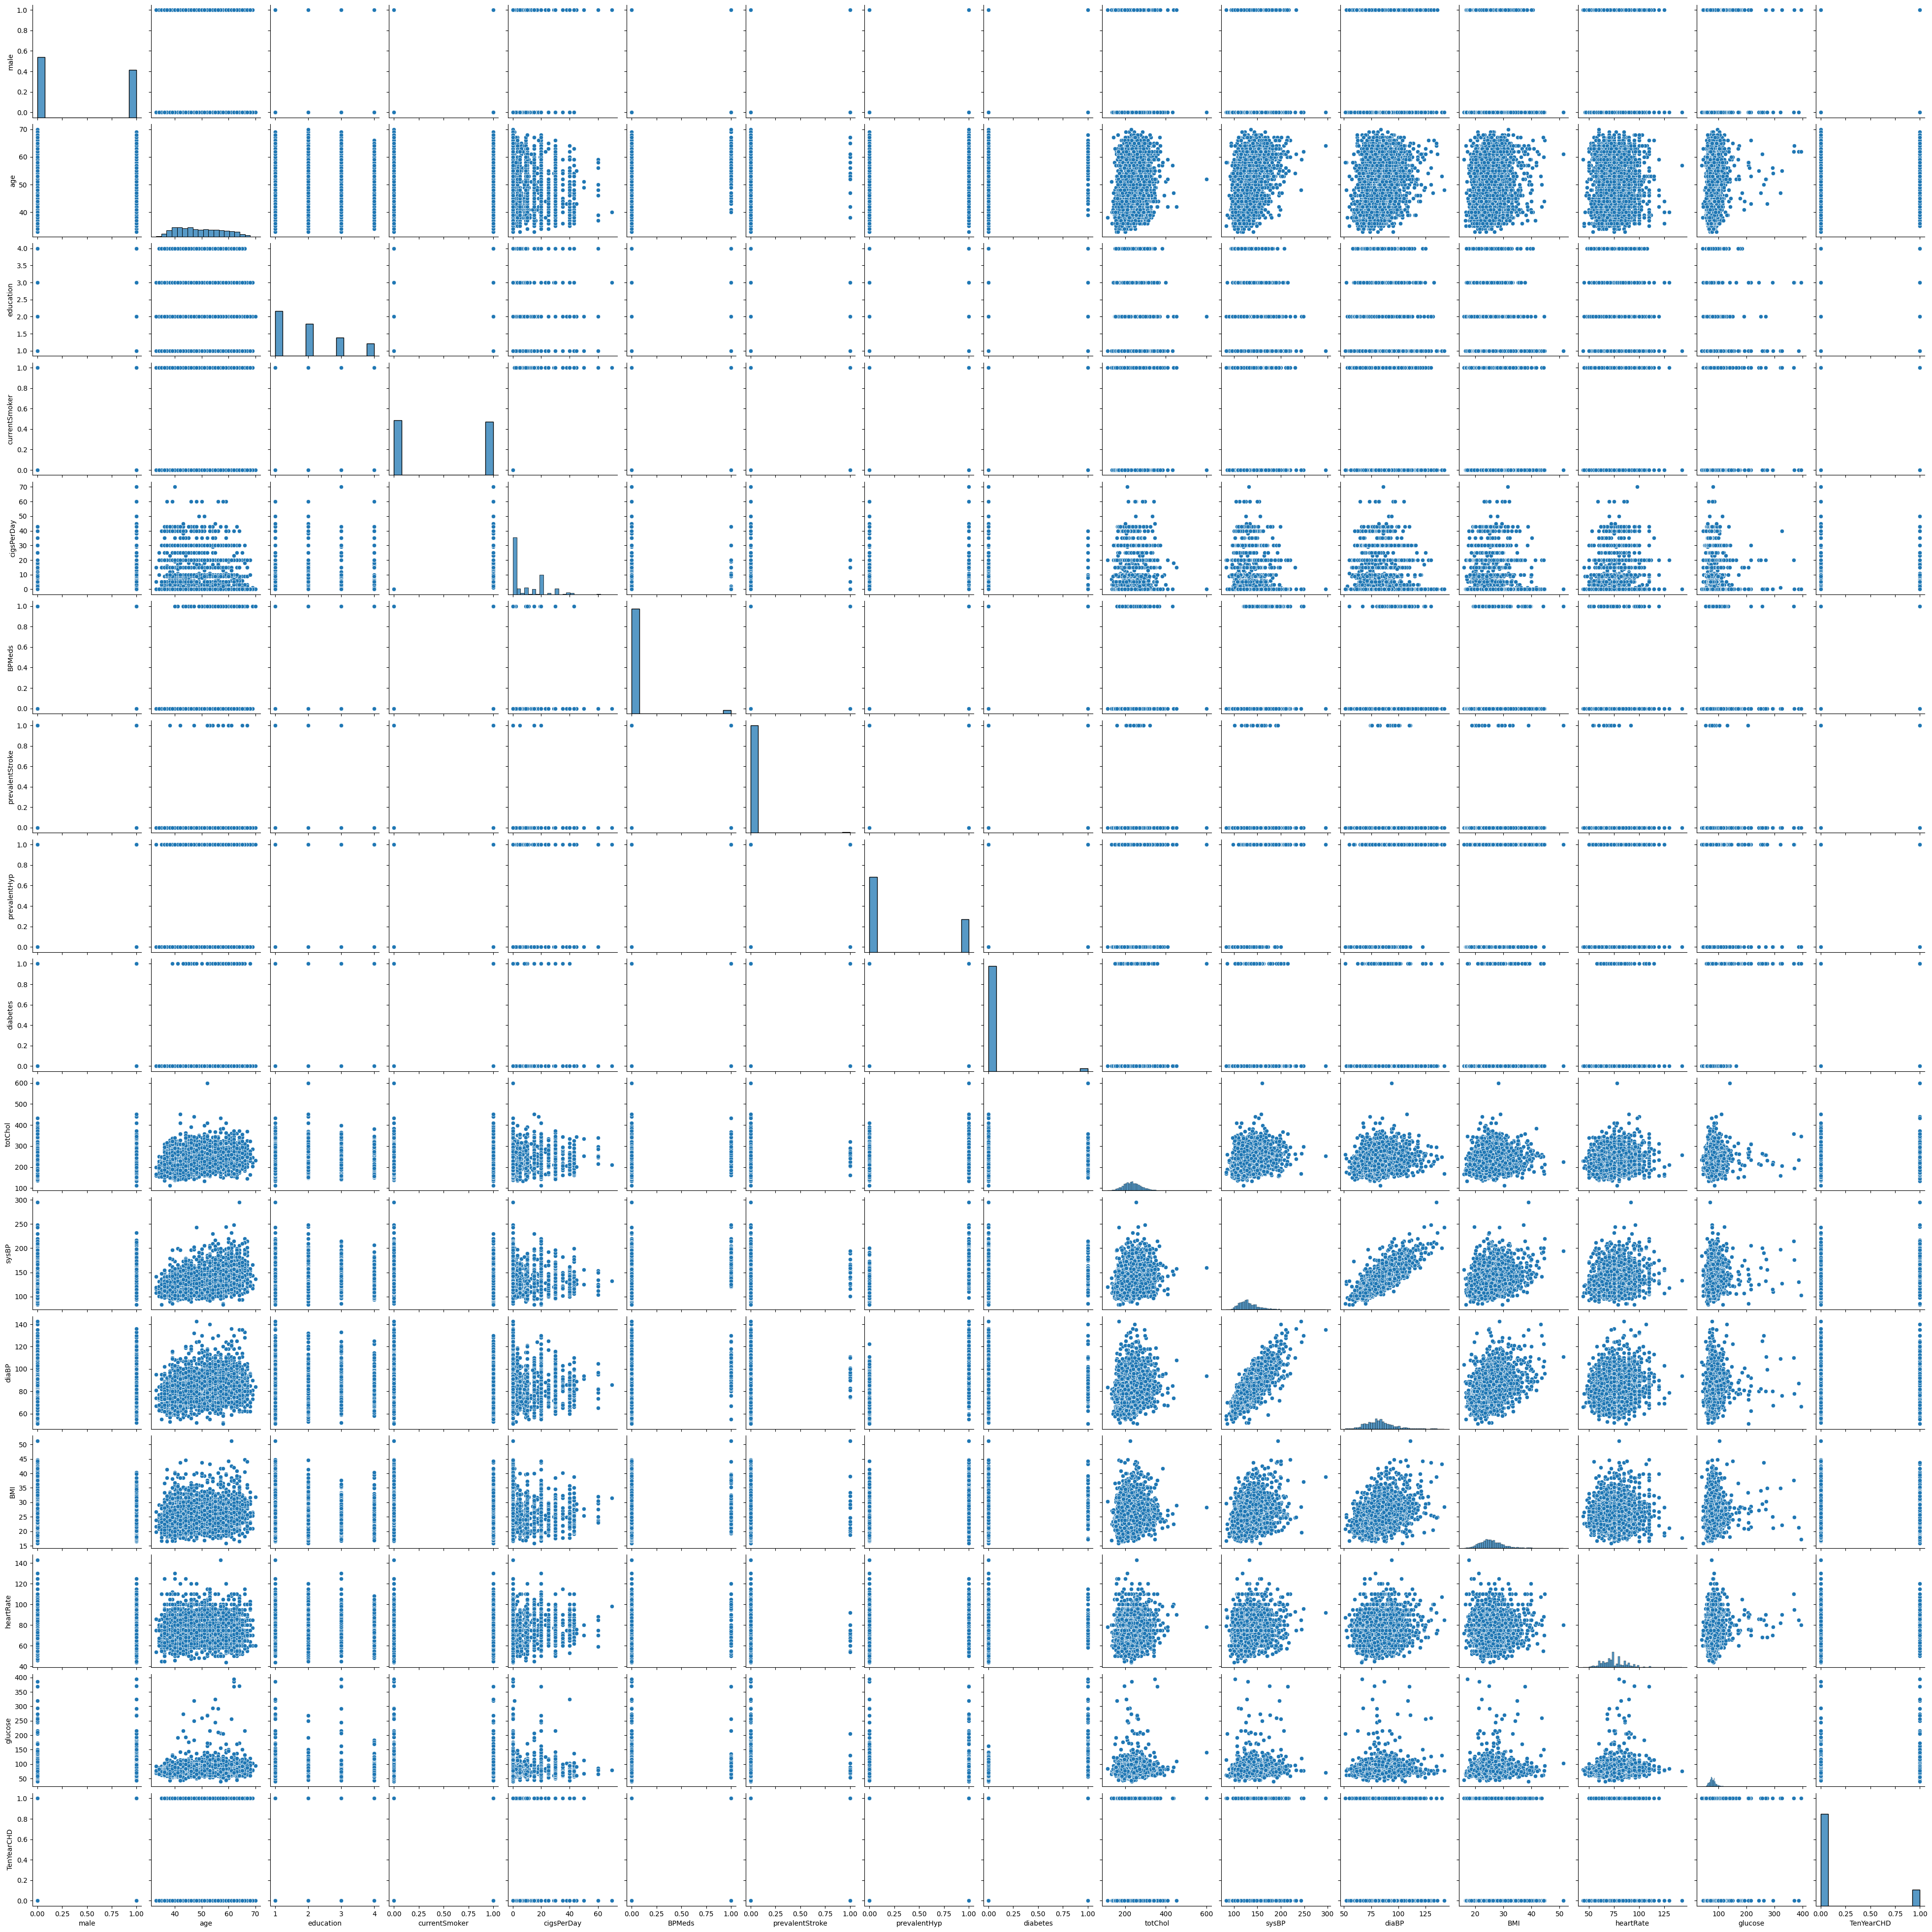

In [39]:
sns.pairplot(train_set)

## Outliers

### Analizing the distribuiton of sys_bp and its yeo-johnson transformed distribution

Text(0.5, 1.0, 'skewness: 0.006')

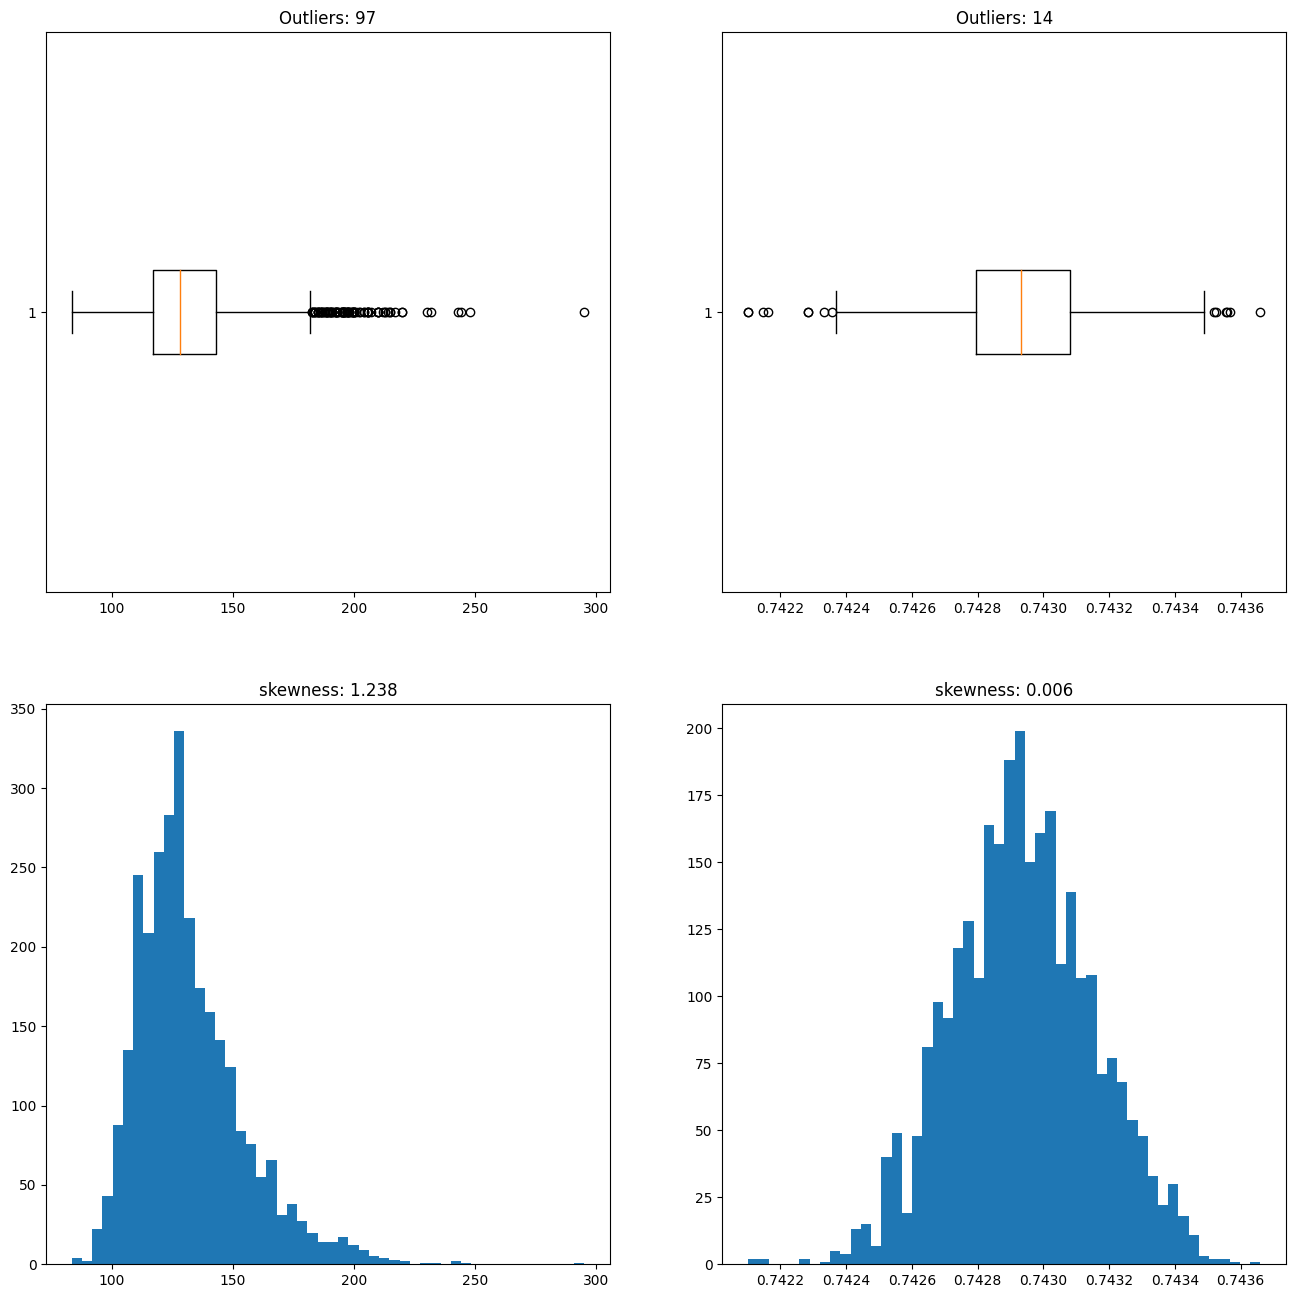

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

fliers = axes[0, 0].boxplot(train_set['sys_bp'], vert=False, whis=1.5)['fliers'][0].get_ydata()
axes[0, 0].set_title(f'Outliers: {len(fliers)}')

trans_sys_bp, lambda_ = yeojohnson(train_set['sys_bp'])
fliers = axes[0, 1].boxplot(trans_sys_bp, vert=False, whis=1.5)['fliers'][0].get_ydata()
axes[0, 1].set_title(f'Outliers: {len(fliers)}')

skewness_orig = skew(train_set['sys_bp'])
axes[1, 0].hist(train_set['sys_bp'], bins=50)
axes[1, 0].set_title(f'skewness: {skewness_orig:.3f}')

trans_skew = skew(trans_sys_bp)
axes[1, 1].hist(trans_sys_bp, bins=50)
axes[1, 1].set_title(f'skewness: {trans_skew:.3f}')

### Analizing the distribution of numerical features and their yeo-johnson transformed distribution

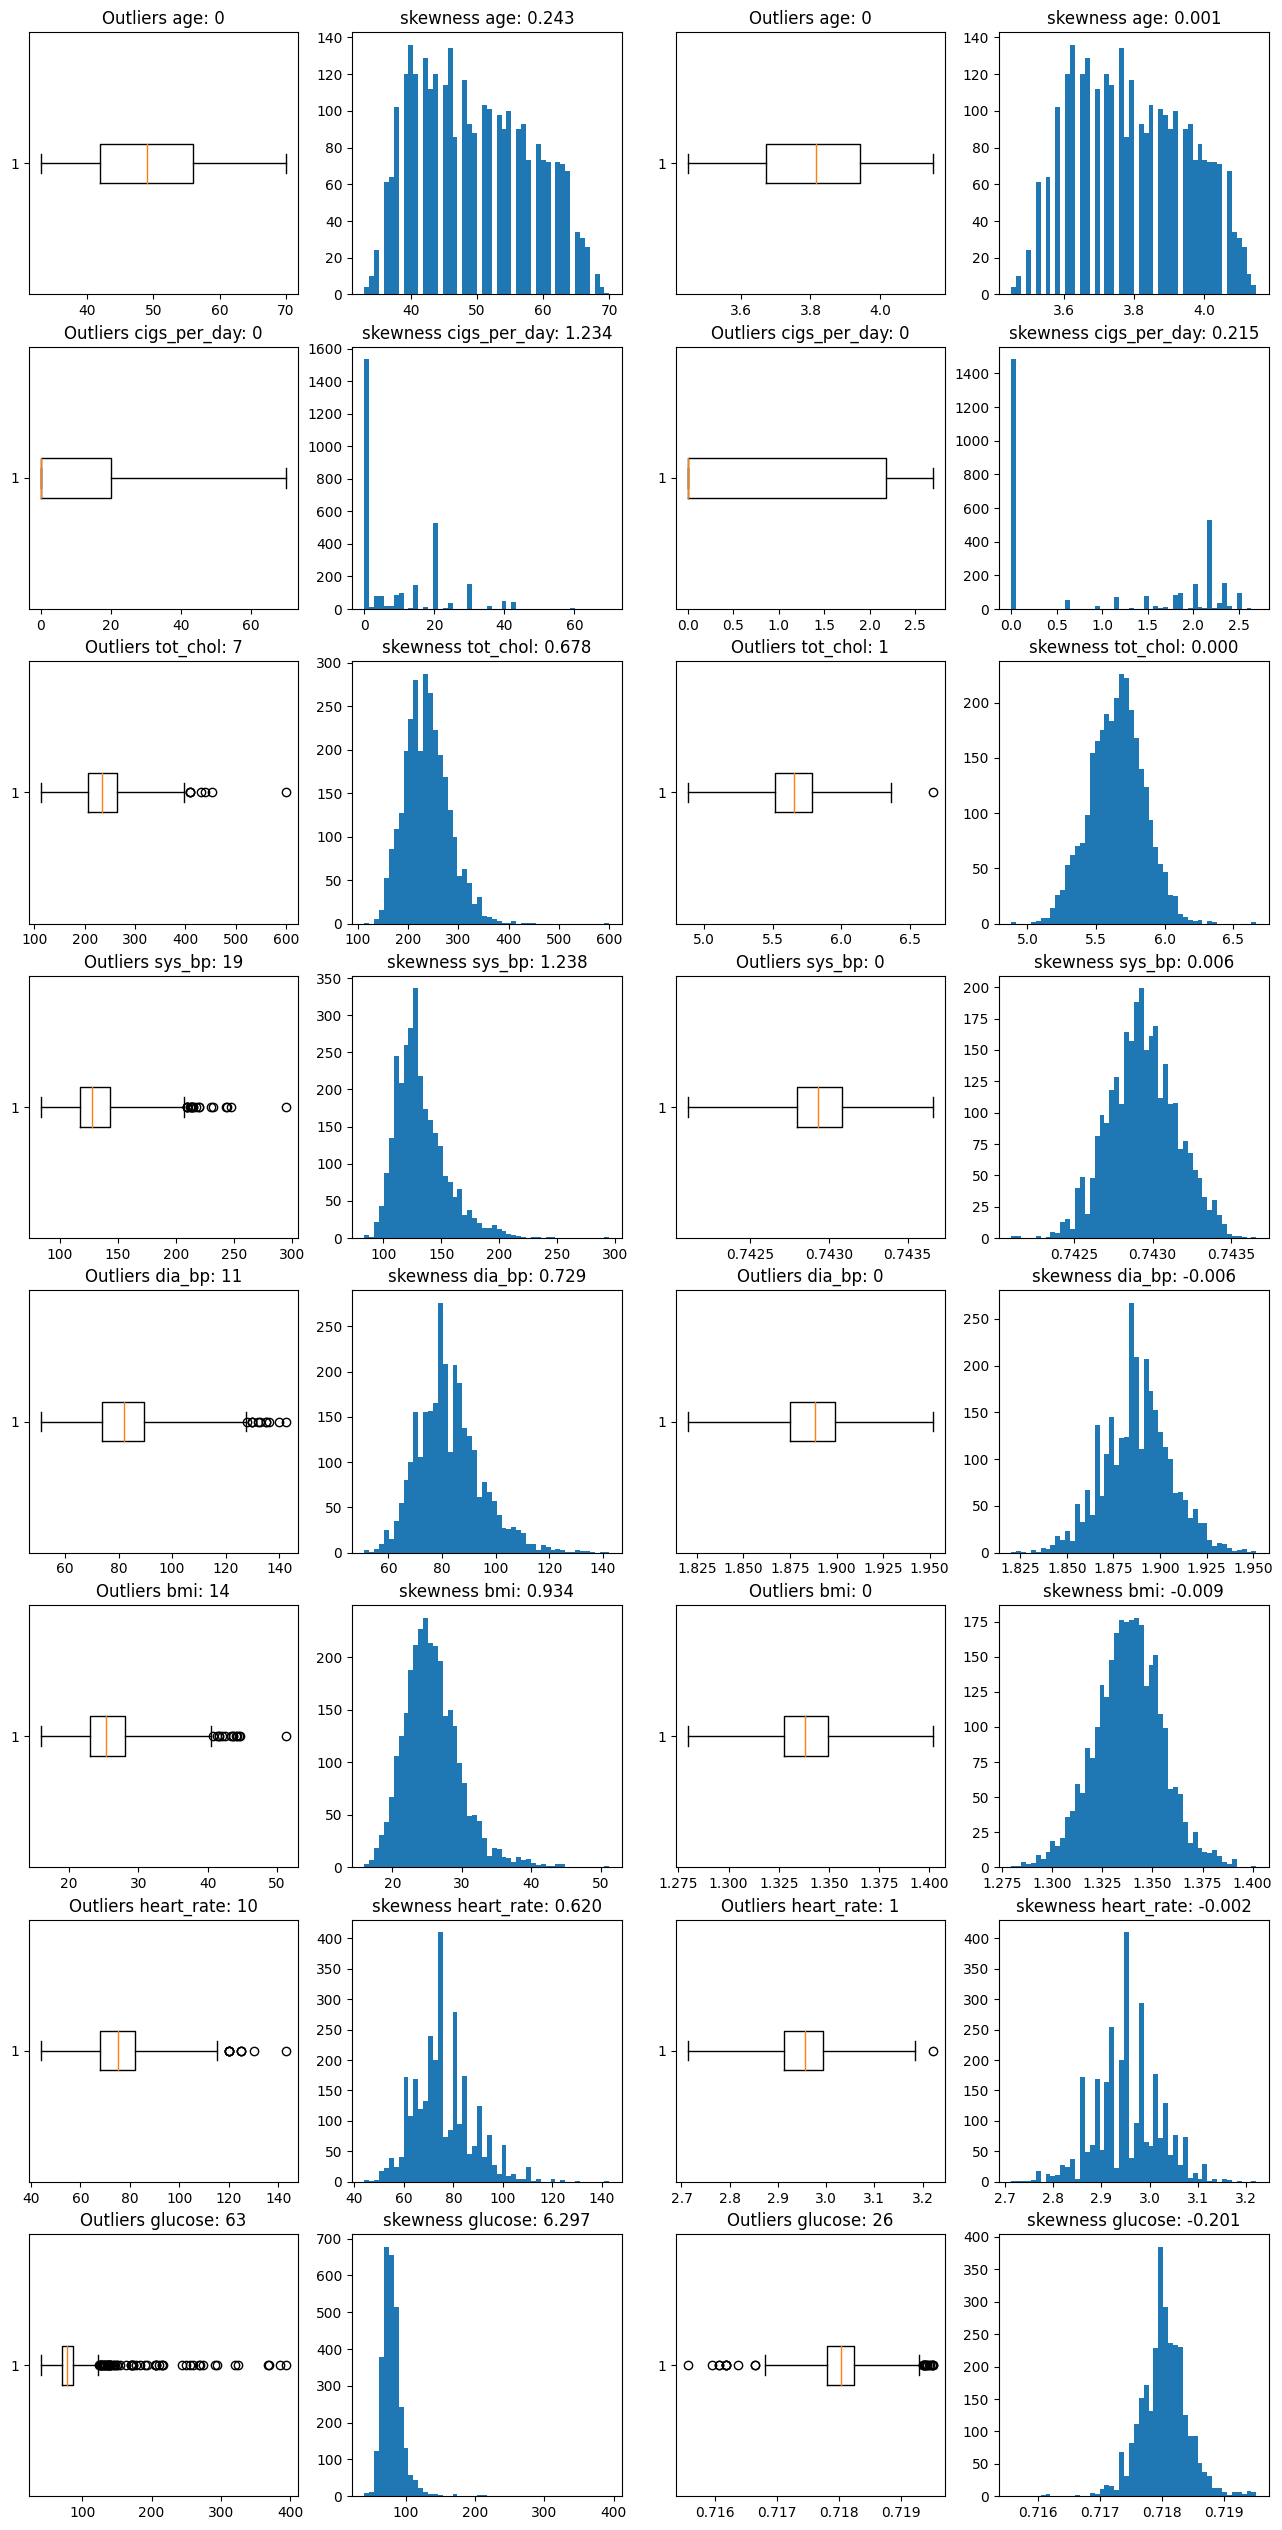

In [59]:
cols = ['age', 'cigs_per_day', 'tot_chol', 'sys_bp', 'dia_bp', 'bmi', 'heart_rate', 'glucose']
n_rows = len(cols)

fig, axes = plt.subplots(n_rows, 4, figsize=(16, 4*n_rows))

for i, col in enumerate(cols):
  fliers = axes[i, 0].boxplot(train_set[col], vert=False, whis=2.5)['fliers'][0].get_ydata()
  axes[i, 0].set_title(f'Outliers {col}: {len(fliers)}')

  skewness_orig = skew(train_set[col])
  axes[i, 1].hist(train_set[col], bins=50)
  axes[i, 1].set_title(f'skewness {col}: {skewness_orig:.3f}')

  transformed, lambda_ = yeojohnson(train_set[col])
  fliers = axes[i, 2].boxplot(transformed, vert=False, whis=2.5)['fliers'][0].get_ydata()
  axes[i, 2].set_title(f'Outliers {col}: {len(fliers)}')

  trans_skew = skew(transformed)
  axes[i, 3].hist(transformed, bins=50)
  axes[i, 3].set_title(f'skewness {col}: {trans_skew:.3f}')

### Handling outliers

In [61]:
cols = ['age', 'cigs_per_day', 'tot_chol', 'sys_bp', 'dia_bp', 'bmi', 'heart_rate', 'glucose']
lambda_list = []
train_set2 = train_set.copy()

for col in cols:
  train_set2[col], lambda_ = yeojohnson(train_set[col])
  lambda_list.append(lambda_)

In [62]:
lambda_list

[-0.01260800759424618,
 -0.23520645960833617,
 0.012756791995981164,
 -1.3440586703720734,
 -0.4602595754514374,
 -0.6612203234191156,
 -0.18922831850833435,
 -1.3894700844248178]

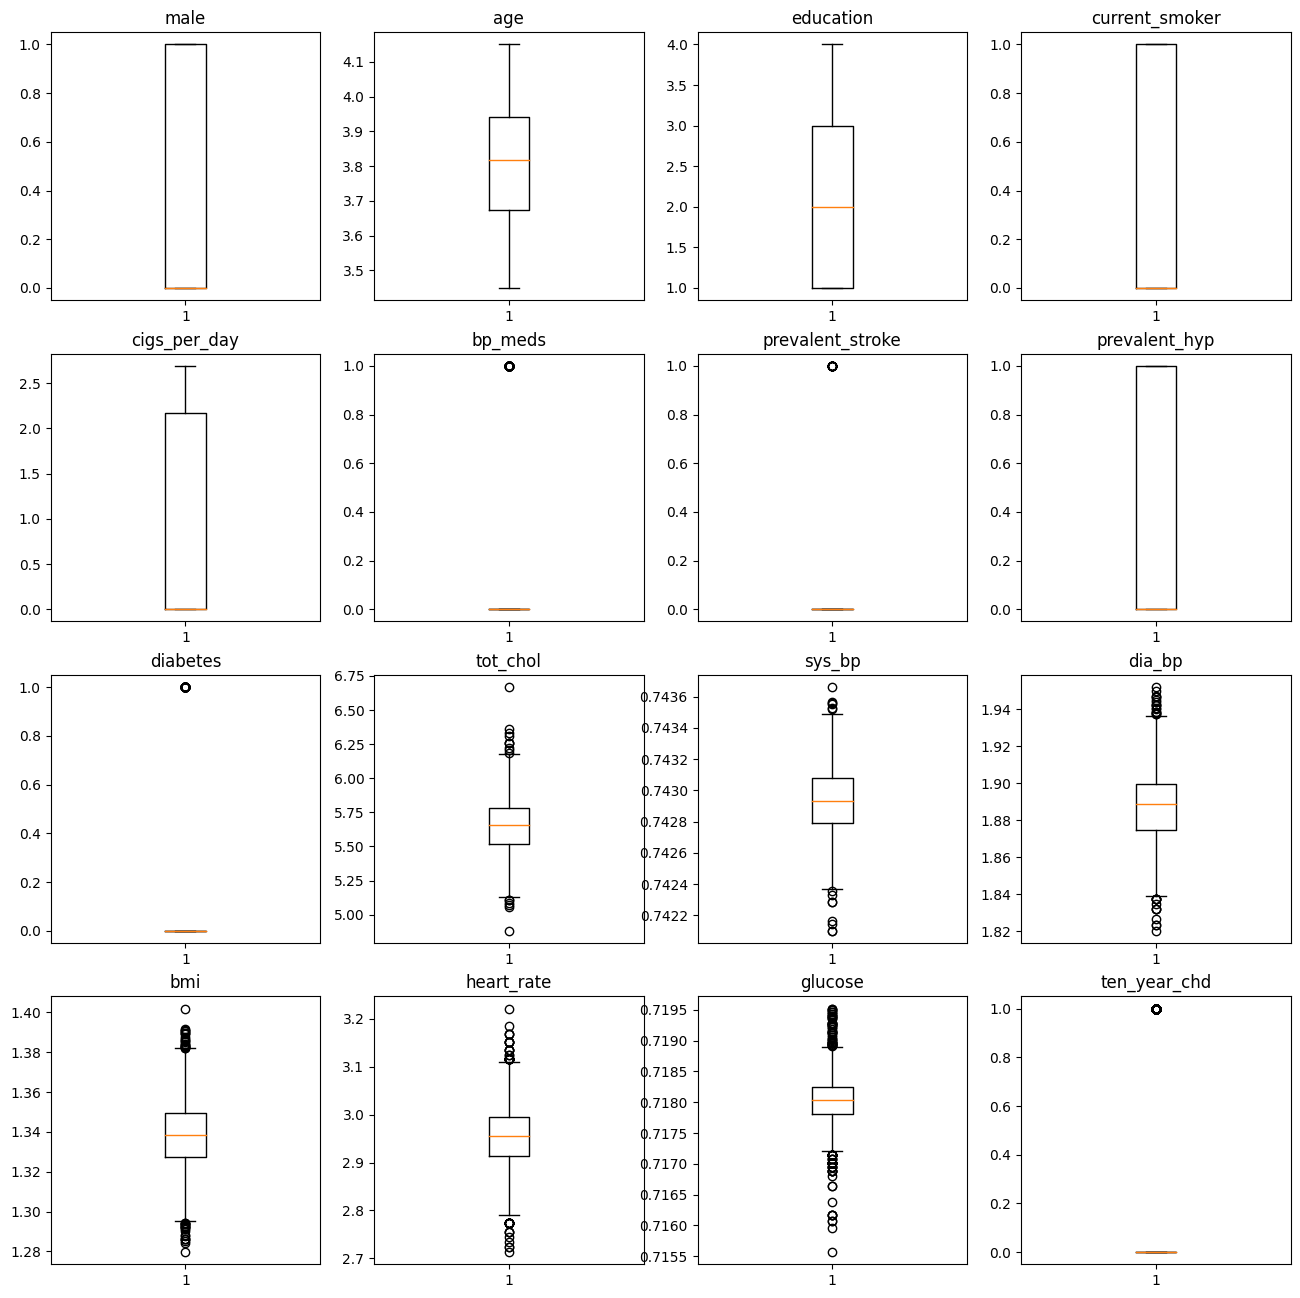

In [63]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes_flat = axes.flatten()

for i, col in enumerate(train_set2.columns):
  ax = axes_flat[i]
  ax.boxplot(train_set2[col])
  ax.set_title(col)

In [65]:
cols = ['age', 'cigs_per_day', 'tot_chol', 'sys_bp', 'dia_bp', 'bmi', 'heart_rate', 'glucose']
desc = train_set2.describe()
Q1 = desc.loc['25%']
Q3 = desc.loc['75%']
IQR = Q3 - Q1
lower_cap = Q1 - 2.5 * IQR
upper_cap = Q3 + 2.5 * IQR

flags = (train_set2[cols] < lower_cap) | (train_set2[cols] > upper_cap)
flags.sum()

<ipython-input-65-daff4c4d10ee>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  flags = (train_set2[cols] < lower_cap) | (train_set2[cols] > upper_cap)
<ipython-input-65-daff4c4d10ee>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  flags = (train_set2[cols] < lower_cap) | (train_set2[cols] > upper_cap)


age                  0
bmi                  0
bp_meds              0
cigs_per_day         0
current_smoker       0
dia_bp               0
diabetes             0
education            0
glucose             26
heart_rate           1
male                 0
prevalent_hyp        0
prevalent_stroke     0
sys_bp               0
ten_year_chd         0
tot_chol             1
dtype: int64

In [66]:
train_set2 = train_set2[~flags.sum(1).astype(np.bool_)]
train_set2

,male,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,ten_year_chd
44,0,3.890335,3.0,0,-0.000000,1.0,0,1,1,5.958609,0.743441,1.902923,1.319409,2.961690,0.719288,1
4091,1,3.695334,4.0,1,2.174011,0.0,0,0,0,5.476113,0.742780,1.874848,1.332293,2.955937,0.718038,0
2046,1,3.580239,2.0,1,1.644601,0.0,0,0,0,5.631144,0.742780,1.867239,1.343942,2.967355,0.717809,0
3182,0,3.890335,1.0,0,-0.000000,0.0,0,1,0,5.795196,0.743154,1.898821,1.350966,3.052218,0.718565,0
328,0,3.990462,1.0,0,-0.000000,0.0,0,1,0,5.707611,0.743371,1.925045,1.309577,3.033972,0.718222,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,1,4.036783,1.0,1,2.355870,0.0,0,0,0,6.153865,0.743040,1.893030,1.329178,2.983845,0.717653,0
1283,1,3.941733,1.0,1,2.036787,0.0,0,0,0,5.459863,0.742656,1.867239,1.327007,2.955937,0.718748,0
3714,1,3.890335,2.0,0,-0.000000,0.0,0,1,0,5.476113,0.743076,1.888422,1.331575,2.833734,0.718038,1
3325,1,4.036783,1.0,1,1.462096,0.0,0,1,0,5.694502,0.743190,1.908101,1.352184,2.955937,0.717809,0


## Data Normalization

### split train_set2 to x and y

In [72]:
x_train = train_set2.iloc[:, :-1]
y_train = train_set2.iloc[:, -1]

44      1
4091    0
2046    0
3182    0
328     1
       ..
3916    0
1283    0
3714    1
3325    0
1414    0
Name: ten_year_chd, Length: 2898, dtype: int64

### normalizaion

In [73]:
normz = MinMaxScaler()
x_train = normz.fit_transform(x_train)
x_train

array([[0.        , 0.62937556, 0.66666667, ..., 0.29878535, 0.5279389 ,
        0.99894267],
       [1.        , 0.35121606, 1.        , ..., 0.40839564, 0.5157176 ,
        0.49561598],
       [1.        , 0.18703815, 0.33333333, ..., 0.50750131, 0.53997289,
        0.40361874],
       ...,
       [1.        , 0.62937556, 0.33333333, ..., 0.40228521, 0.25612405,
        0.49561598],
       [1.        , 0.83827557, 0.        , ..., 0.57762355, 0.5157176 ,
        0.40361874],
       [0.        , 0.22151707, 0.        , ..., 0.44381784, 0.77488868,
        0.73673367]])

## Model selection

In [76]:
y_train = np.array(y_train)
y_train

array([1, 0, 0, ..., 1, 0, 0])

In [77]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

## Test

In [78]:
test_set

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1365,0,56,1.0,0,0.0,0.0,0,0,0,259.0,138.0,87.0,30.73,60.0,75.0,0
2391,1,47,1.0,0,0.0,0.0,0,0,0,265.0,137.5,88.5,23.75,83.0,90.0,0
2473,0,66,1.0,1,1.0,1.0,0,1,0,261.0,154.0,97.0,32.60,70.0,81.0,0
1889,0,65,1.0,0,0.0,0.0,0,0,0,288.0,146.0,94.5,26.54,80.0,74.0,0
3243,1,50,2.0,0,0.0,0.0,0,0,0,258.0,129.0,84.0,24.56,80.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,0,38,3.0,0,0.0,0.0,0,0,0,162.0,105.0,70.0,21.35,72.0,71.0,0
2365,0,32,2.0,1,15.0,0.0,0,0,0,242.0,111.0,70.0,29.84,80.0,88.0,0
436,1,54,1.0,0,0.0,0.0,0,1,0,224.0,170.0,102.0,29.18,72.0,NaN,0
1010,1,42,1.0,1,30.0,0.0,0,0,0,232.0,111.5,70.0,28.30,90.0,80.0,0


### missing values

<Axes: >

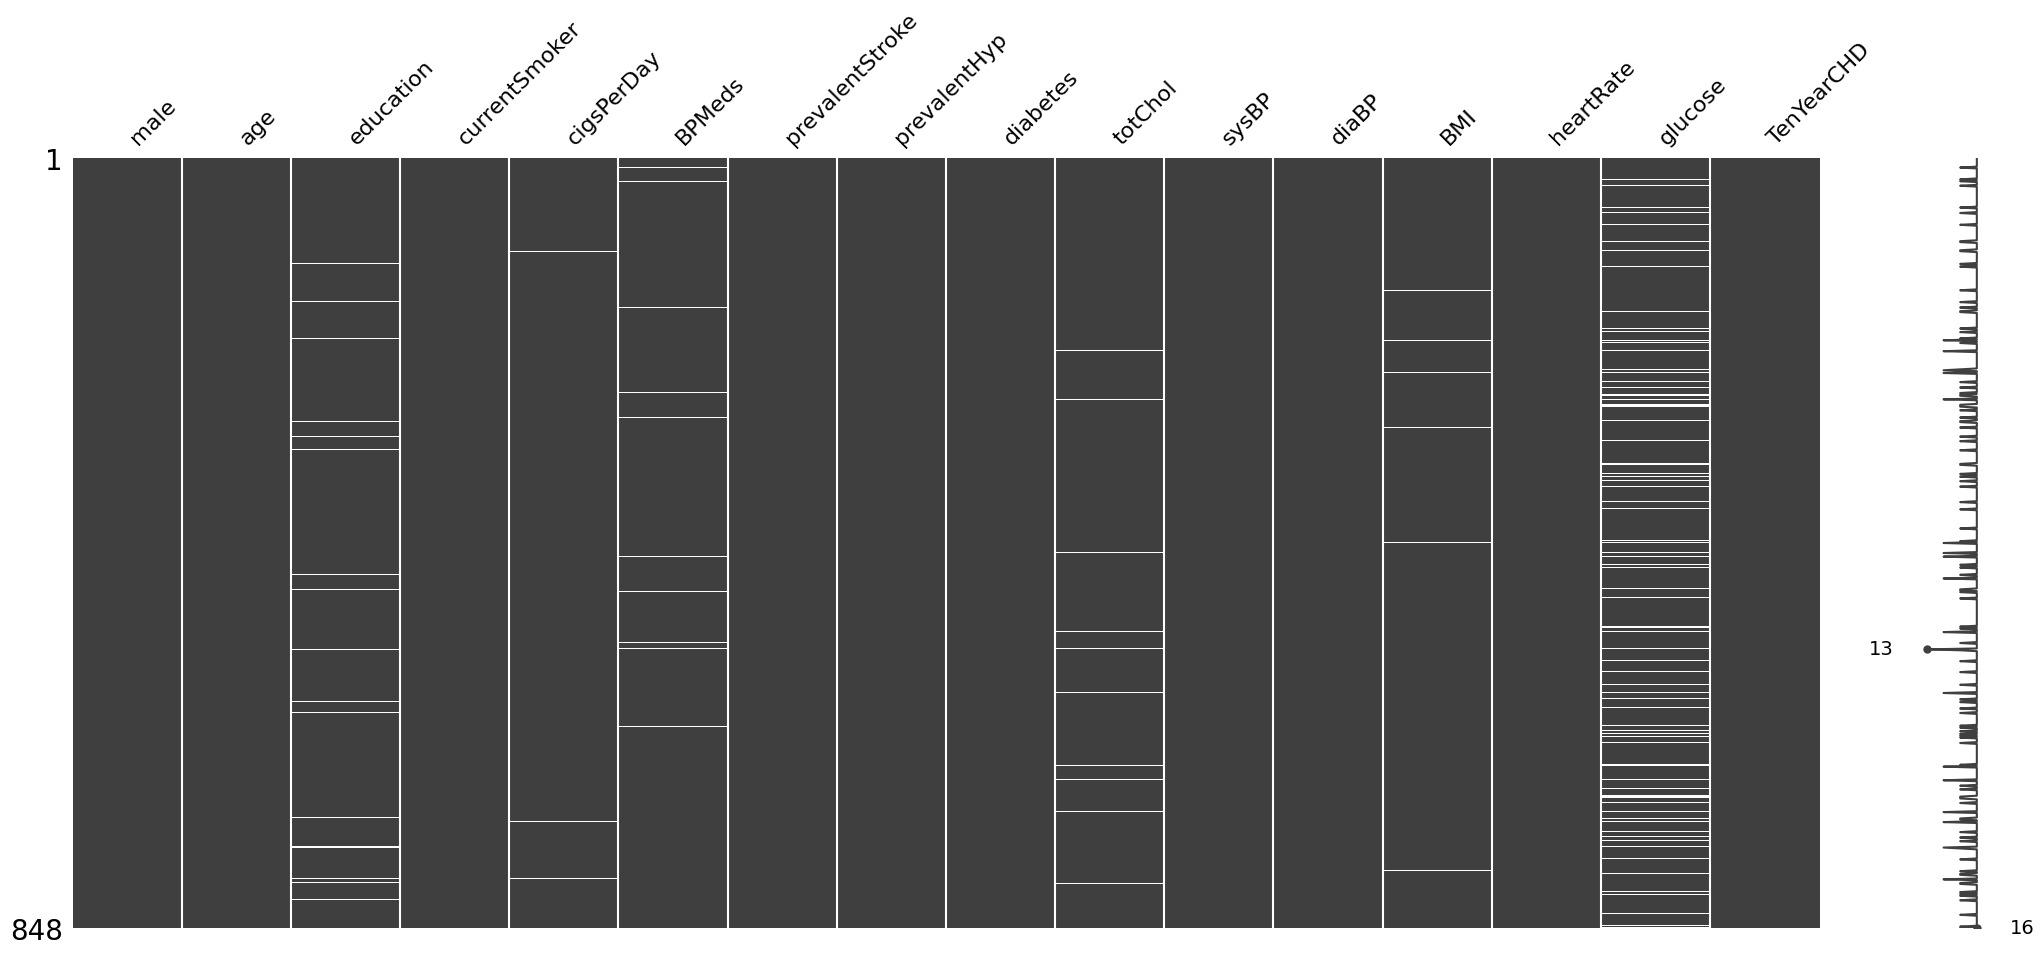

In [79]:
msno.matrix(test_set)

In [80]:
test_set.isna().sum()

male                0
age                 0
education          17
currentSmoker       0
cigsPerDay          3
BPMeds             10
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            12
sysBP               0
diaBP               0
BMI                 6
heartRate           0
glucose            89
TenYearCHD          0
dtype: int64

In [83]:
test_set = test_set.dropna()
test_set

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1365,0,56,1.0,0,0.0,0.0,0,0,0,259.0,138.0,87.0,30.73,60.0,75.0,0
2391,1,47,1.0,0,0.0,0.0,0,0,0,265.0,137.5,88.5,23.75,83.0,90.0,0
2473,0,66,1.0,1,1.0,1.0,0,1,0,261.0,154.0,97.0,32.60,70.0,81.0,0
1889,0,65,1.0,0,0.0,0.0,0,0,0,288.0,146.0,94.5,26.54,80.0,74.0,0
3243,1,50,2.0,0,0.0,0.0,0,0,0,258.0,129.0,84.0,24.56,80.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0,55,2.0,0,0.0,0.0,0,1,0,183.0,158.0,86.0,24.45,70.0,102.0,0
597,1,60,3.0,0,0.0,0.0,0,1,0,276.0,144.0,78.0,26.98,60.0,88.0,0
1982,0,38,3.0,0,0.0,0.0,0,0,0,162.0,105.0,70.0,21.35,72.0,71.0,0
2365,0,32,2.0,1,15.0,0.0,0,0,0,242.0,111.0,70.0,29.84,80.0,88.0,0


In [84]:
test_set.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### rename the columns for more codable

In [85]:
test_set.rename(columns={'currentSmoker': 'current_smoker',
                          'cigsPerDay': 'cigs_per_day',
                          'BPMeds': 'bp_meds',
                          'prevalentStroke': 'prevalent_stroke',
                          'prevalentHyp': 'prevalent_hyp',
                          'totChol': 'tot_chol',
                          'sysBP': 'sys_bp',
                          'diaBP': 'dia_bp',
                          'BMI': 'bmi',
                          'heartRate': 'heart_rate',
                          'TenYearCHD': 'ten_year_chd'}, inplace=True)

<ipython-input-85-d07867e14a62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.rename(columns={'currentSmoker': 'current_smoker',


In [86]:
test_set

,male,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,ten_year_chd
1365,0,56,1.0,0,0.0,0.0,0,0,0,259.0,138.0,87.0,30.73,60.0,75.0,0
2391,1,47,1.0,0,0.0,0.0,0,0,0,265.0,137.5,88.5,23.75,83.0,90.0,0
2473,0,66,1.0,1,1.0,1.0,0,1,0,261.0,154.0,97.0,32.60,70.0,81.0,0
1889,0,65,1.0,0,0.0,0.0,0,0,0,288.0,146.0,94.5,26.54,80.0,74.0,0
3243,1,50,2.0,0,0.0,0.0,0,0,0,258.0,129.0,84.0,24.56,80.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0,55,2.0,0,0.0,0.0,0,1,0,183.0,158.0,86.0,24.45,70.0,102.0,0
597,1,60,3.0,0,0.0,0.0,0,1,0,276.0,144.0,78.0,26.98,60.0,88.0,0
1982,0,38,3.0,0,0.0,0.0,0,0,0,162.0,105.0,70.0,21.35,72.0,71.0,0
2365,0,32,2.0,1,15.0,0.0,0,0,0,242.0,111.0,70.0,29.84,80.0,88.0,0


### Feature transform

In [87]:
cols = ['age', 'cigs_per_day', 'tot_chol', 'sys_bp', 'dia_bp', 'bmi', 'heart_rate', 'glucose']

for i, col in enumerate(cols):
  test_set[col] = yeojohnson(test_set[col], lambda_list[i])
test_set

<ipython-input-87-f72abac11095>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set[col] = yeojohnson(test_set[col], lambda_list[i])


,male,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,ten_year_chd
1365,0,3.941733,1.0,0,-0.000000,0.0,0,0,0,5.762657,0.743035,1.895973,1.358592,2.857011,0.717946,0
2391,1,3.778246,1.0,0,-0.000000,0.0,0,0,0,5.787152,0.743030,1.898118,1.331140,2.999624,0.718334,0
2473,0,4.095185,1.0,1,0.639594,1.0,0,1,0,5.770883,0.743169,1.909347,1.364306,2.925755,0.718121,0
1889,0,4.080922,1.0,0,-0.000000,0.0,0,0,0,5.876252,0.743106,1.906197,1.343498,2.983845,0.717913,0
3243,1,3.835961,2.0,0,-0.000000,0.0,0,0,0,5.758520,0.742943,1.891520,1.334958,2.983845,0.717946,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0,3.924911,2.0,0,-0.000000,0.0,0,1,0,5.392311,0.743197,1.894514,1.334452,2.925755,0.718550,0
597,1,4.006158,3.0,0,-0.000000,0.0,0,1,0,5.830676,0.743089,1.881886,1.345258,2.857011,0.718291,0
1982,0,3.580239,3.0,0,-0.000000,0.0,0,0,0,5.262890,0.742604,1.867239,1.318497,2.938122,0.717809,0
2365,0,3.420558,2.0,1,2.036787,0.0,0,0,0,5.690097,0.742705,1.867239,1.355672,2.983845,0.718291,0


### Data normalization

In [88]:
x_test = test_set.iloc[:, :-1]
y_test = test_set.iloc[:, -1]

x_test.shape, y_test.shape

((730, 15), (730,))

In [89]:
x_test = normz.transform(x_test)
x_test

array([[ 0.        ,  0.70269194,  0.        , ...,  0.63213943,
         0.30557198,  0.45866511],
       [ 1.        ,  0.46948596,  0.        , ...,  0.39858945,
         0.60852146,  0.61488688],
       [ 0.        ,  0.92158346,  0.        , ...,  0.68074495,
         0.45160265,  0.52935996],
       ...,
       [ 0.        ,  0.18703815,  0.66666667, ...,  0.29102457,
         0.47787427,  0.40361874],
       [ 0.        , -0.04073965,  0.33333333, ...,  0.60729789,
         0.57500214,  0.59765979],
       [ 1.        ,  0.31994597,  0.        , ...,  0.56137472,
         0.68148765,  0.5184435 ]])

In [90]:
y_test = np.array(y_test)
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

### Test the model

In [96]:
acc = model.score(x_test, y_test)
print(f'Accuracy: {acc}')

Accuracy: 0.8410958904109589


In [98]:
y_hat = model.predict(x_test)

In [99]:
confusion_matrix(y_test, y_hat)

array([[608,   1],
       [115,   6]])

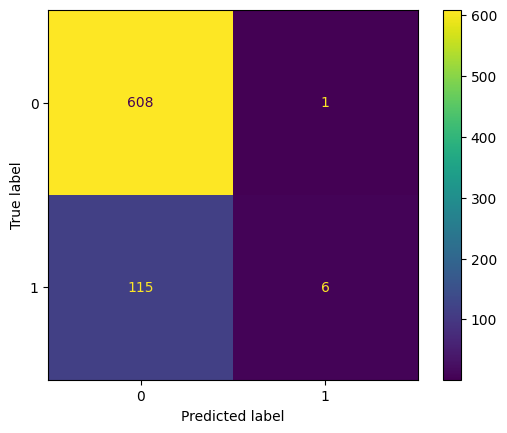

In [100]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)